# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nathaniel
- **Email:** nathanieltrisno@gmail.com
- **ID Dicoding:** Nathaniel

## Menentukan Pertanyaan Bisnis

- Produk manakah yang memiliki penjualan tertinggi (terlaris)
- Dimana daerah yang melakukan transaksi terbanyak
- Jenis pembayaran apa yang paling banyak digunakan oleh pelanggan


## Import Semua Packages/Library yang Digunakan

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [44]:
df_customers = pd.read_csv('data/customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [45]:
df_geoloc= pd.read_csv('data/geolocation_dataset.csv')
df_geoloc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [46]:
df_orderitems= pd.read_csv('data/order_items_dataset.csv')
df_orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [47]:
df_payments = pd.read_csv('data/order_payments_dataset.csv')
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [48]:
df_orders = pd.read_csv('data/orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [49]:
df_products = pd.read_csv('data/products_dataset.csv')  
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [50]:
df_prodEng = pd.read_csv('data/product_category_name_translation.csv')
df_prodEng.head()  

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

1. Checking Data Type

In [51]:
#Check the data type of for every dataframe
print(df_customers.info(), "\n")
print(df_geoloc.info(), "\n")
print(df_orderitems.info(), "\n")
print(df_payments.info(), "\n")
print(df_orders.info(), "\n")
print(df_products.info(), "\n")
print(df_prodEng.info(), "\n")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

2. Checking Null 

In [52]:
#Check if there is null of for every dataframe
print("Jumlah null pada dataframe customers: ", "\n", df_customers.isnull().sum(), "\n")
print("Jumlah null pada dataframe geolocation: ", "\n",df_geoloc.isnull().sum(), "\n")
print("Jumlah null pada dataframe orderitems: ", "\n",df_orderitems.isnull().sum(), "\n")
print("Jumlah null pada dataframe payments: ", "\n",df_payments.isnull().sum(), "\n")
print("Jumlah null pada dataframe orders: ", "\n",df_orders.isnull().sum(), "\n")
print("Jumlah null pada dataframe products: ", "\n",df_products.isnull().sum(), "\n")
print("Jumlah null pada dataframe product_eng: ", "\n",df_prodEng.isnull().sum(), "\n")

Jumlah null pada dataframe customers:  
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Jumlah null pada dataframe geolocation:  
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Jumlah null pada dataframe orderitems:  
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Jumlah null pada dataframe payments:  
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

Jumlah null pada dataframe orders:  
 order_id                            0
customer_id                         0
order_status                        0
or

3. Checking duplicate

In [53]:
#Check data duplicate in every dataframe
print("Jumlah data duplicate pada dataframe customers: ", df_customers.duplicated().sum(), "\n")
print("Jumlah data duplicate pada dataframe geolocation: ", df_geoloc.duplicated().sum(), "\n")
print("Jumlah data duplicate pada dataframe orderitems: ", df_orderitems.duplicated().sum(), "\n")
print("Jumlah data duplicate pada dataframe payments: ", df_payments.duplicated().sum(), "\n")
print("Jumlah data duplicate pada dataframe orders: ", df_orders.duplicated().sum(), "\n")
print("Jumlah data duplicate pada dataframe products: ", df_products.duplicated().sum(), "\n")
print("Jumlah data duplicate pada dataframe product_eng: ", df_prodEng.duplicated().sum(), "\n")

Jumlah data duplicate pada dataframe customers:  0 

Jumlah data duplicate pada dataframe geolocation:  261831 

Jumlah data duplicate pada dataframe orderitems:  0 

Jumlah data duplicate pada dataframe payments:  0 

Jumlah data duplicate pada dataframe orders:  0 

Jumlah data duplicate pada dataframe products:  0 

Jumlah data duplicate pada dataframe product_eng:  0 



### Cleaning Data

1. Cleaning payments data/df_payments

In [54]:
df_payments = df_payments.drop(columns=["payment_sequential", "payment_installments"], axis=0) #Dropping payment_sequential and payment_installments columns beacuse it won't be used in asnwering the questions
df_payments.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


2. Cleaning orders data/df_orders

In [55]:
df_ordersdeliv = df_orders[df_orders['order_status'] == 'delivered'] #Filtering the order_status column to only include the delivered orders beacuse we assume that the orders that have ben delivered have already been successfully transactions
df_ordersdeliv.head()
print(df_ordersdeliv['order_status'].value_counts())
df_ordersdeliv.info()

order_status
delivered    96478
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96478 non-null  object
 1   customer_id                    96478 non-null  object
 2   order_status                   96478 non-null  object
 3   order_purchase_timestamp       96478 non-null  object
 4   order_approved_at              96464 non-null  object
 5   order_delivered_carrier_date   96476 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  96478 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


3. Cleaning products data/df_products

In [56]:
df_products[df_products.isnull().any(axis=1)]
df_products['product_category_name'].fillna('others', inplace=True) #Filling the null values in the product_category_name column with 'others' we assume that the null values are the products that don't have any category
df_products = df_products[["product_id","product_category_name"]]
df_products.tail()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3744\1328349976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_category_name'].fillna('others', inplace=True) #Filling the null values in the product_category_name column with 'others' we assume that the null values are the products that don't have any category


,product_id,product_category_name
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios
32950,106392145fca363410d287a815be6de4,cama_mesa_banho


## Exploratory Data Analysis (EDA)

### Explore ...

1. Combining products data and the translataion

In [57]:
products = pd.merge(
    left=df_products,
    right=df_prodEng,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [58]:
products['product_category_name_english'].fillna('others', inplace=True) #Filling the null values in the product_category_name_english column with 'others' we assume that the null values are the products that don't have any category
products.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3744\4264758569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_category_name_english'].fillna('others', inplace=True) #Filling the null values in the product_category_name_english column with 'others' we assume that the null values are the products that don't have any category


product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

2.Combining Order items and products data

In [59]:
order_items_with_category = pd.merge(
    left=df_orderitems,
    right=products,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_with_category.head()
order_items_with_category.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          112650 non-null  object 
 8   product_category_name_english  112650 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.7+ MB


3. Combine orders and order items

In [60]:
print(df_orders.info())
print(order_items_with_category.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id            

In [61]:
orders_and_items = pd.merge(
    left=df_ordersdeliv,
    right=order_items_with_category,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_and_items = orders_and_items[orders_and_items["order_status"] == "delivered"]
orders_and_items.head()
orders_and_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110182 non-null  object 
 5   order_delivered_carrier_date   110195 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

4. Merge Customers data and orders data

In [62]:
order_items_with_category_and_customers = pd.merge(
    left=orders_and_items,
    right=df_customers,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
order_items_with_category_and_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110182 non-null  object 
 5   order_delivered_carrier_date   110195 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

5. Merge orders and payment methods

In [63]:
complete_order = pd.merge(
    left=order_items_with_category_and_customers,
    right=df_payments,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
complete_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115038 entries, 0 to 115037
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115038 non-null  object 
 1   customer_id                    115038 non-null  object 
 2   order_status                   115038 non-null  object 
 3   order_purchase_timestamp       115038 non-null  object 
 4   order_approved_at              115023 non-null  object 
 5   order_delivered_carrier_date   115036 non-null  object 
 6   order_delivered_customer_date  115030 non-null  object 
 7   order_estimated_delivery_date  115038 non-null  object 
 8   order_item_id                  115038 non-null  int64  
 9   product_id                     115038 non-null  object 
 10  seller_id                      115038 non-null  object 
 11  shipping_limit_date            115038 non-null  object 
 12  price                         

In [64]:
complete_order.groupby(by="product_category_name_english").customer_id.nunique()

product_category_name_english
agro_industry_and_commerce     177
air_conditioning               246
art                            195
arts_and_craftmanship           23
audio                          348
                              ... 
stationery                    2264
tablets_printing_image          79
telephony                     4093
toys                          3804
watches_gifts                 5495
Name: customer_id, Length: 72, dtype: int64

In [65]:
complete_order.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    40501
RJ    12350
MG    11354
RS     5345
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1279
PA      946
MT      886
MA      717
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: customer_id, dtype: int64

In [66]:
complete_order.groupby(by="payment_type").customer_id.nunique().sort_values(ascending=False)

payment_type
credit_card    74304
boleto         19191
voucher         3679
debit_card      1485
Name: customer_id, dtype: int64

In [67]:
complete_order.to_csv('data/complete_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk manakah yang memiliki penjualan tertinggi (terlaris)

In [68]:
pertanyaan1 = complete_order.groupby(by="product_category_name_english")["product_id"].count().reset_index()
pertanyaan1.sort_values(by="product_id", ascending=False, inplace=True)
pertanyaan1.tail(10)

,product_category_name_english,product_id
41,furniture_mattress_and_upholstery,40
23,diapers_and_hygiene,37
35,flowers,33
46,home_comfort_2,31
32,fashion_sport,29
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,7
62,security_and_services,2


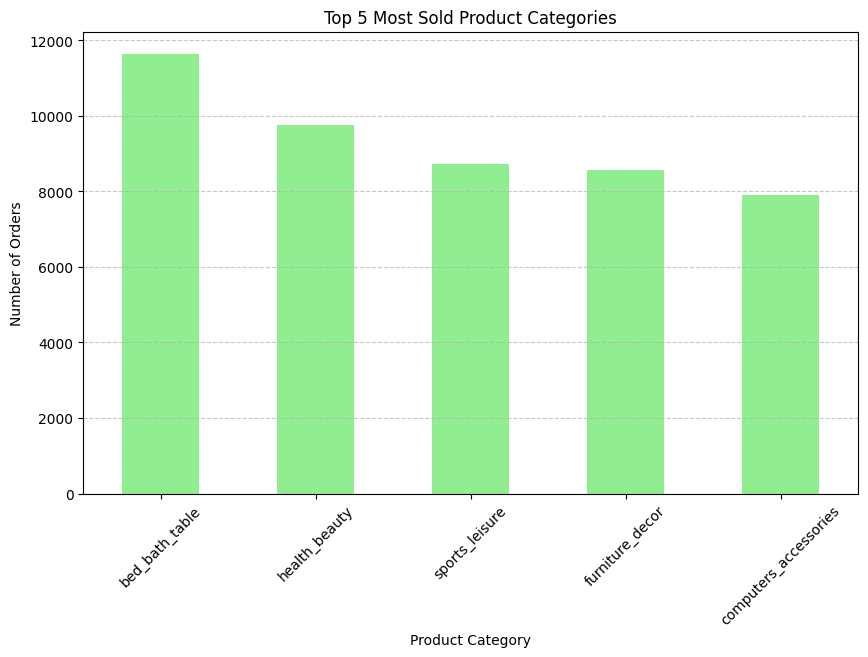

In [69]:
category_counts = complete_order['product_category_name_english'].value_counts().head(5)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Most Sold Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2:Dimana daerah yang melakukan transaksi terbanyak

In [70]:
pertanyaan2 = complete_order.groupby(by="customer_state").customer_id.nunique().reset_index()
pertanyaan2 = pertanyaan2.sort_values(by="customer_id", ascending=False)
pertanyaan2.head()

,customer_state,customer_id
25,SP,40501
18,RJ,12350
10,MG,11354
22,RS,5345
17,PR,4923


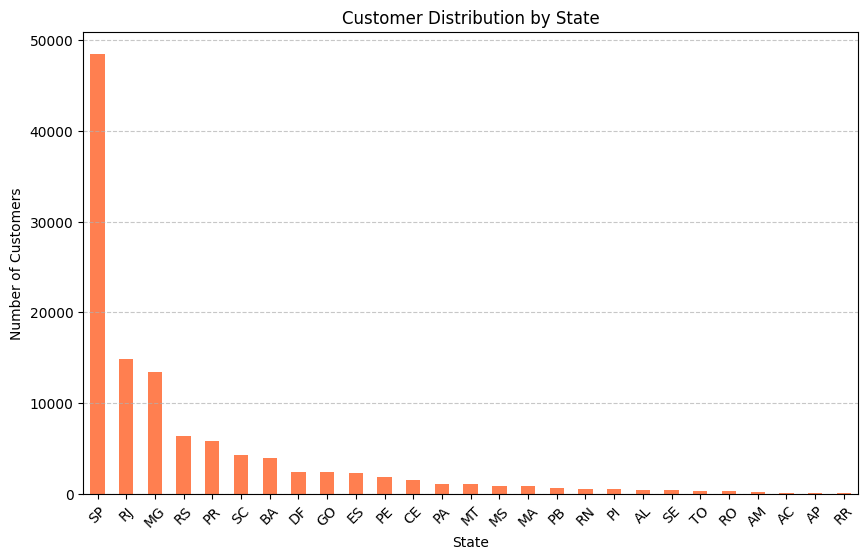

In [71]:
state_counts = complete_order['customer_state'].value_counts()
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='coral')
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 3:Jenis pembayaran apa yang paling banyak digunakan oleh pelanggan

In [72]:
pertanyaan3 = complete_order.groupby(by="payment_type").customer_id.nunique().reset_index()
pertanyaan3 = pertanyaan3.sort_values(by="customer_id", ascending=False)
pertanyaan3.head()

,payment_type,customer_id
1,credit_card,74304
0,boleto,19191
3,voucher,3679
2,debit_card,1485


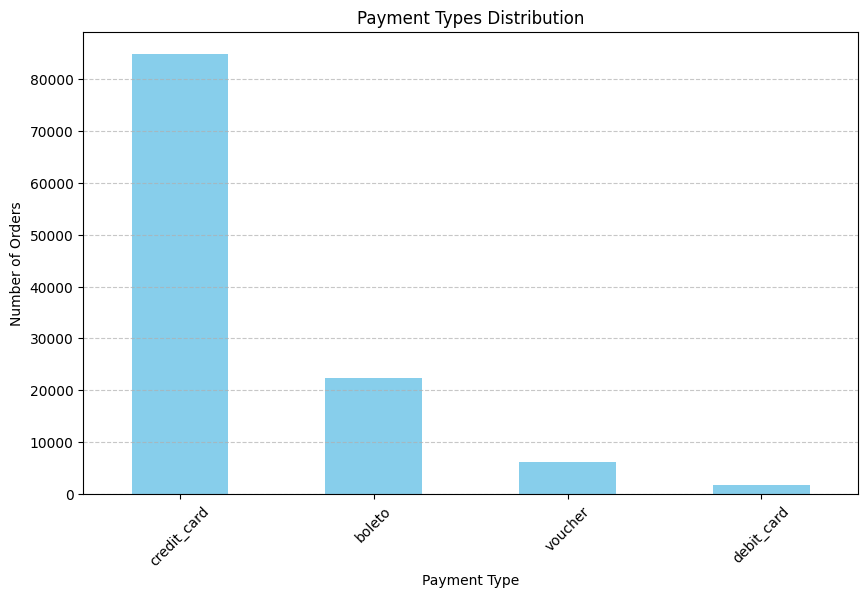

In [73]:
payment_type = complete_order['payment_type'].value_counts()
plt.figure(figsize=(10, 6))
payment_type.plot(kind='bar', color='skyblue')
plt.title('Payment Types Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Product with bed bath table category is the most ordered product category
- Conclution pertanyaan 2: SP or Sao Paolo is the most states that make an order
- Conclusion pertanyaan 3: Credit card is the most choosen payment method